## Data Preprocessing

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def data_preprocessing(data_name,pre_days):
    
    data = pd.read_csv("../input/d/pentiumlin/taiwan-and-usa-stocks-data/stock2/"+ data_name +".csv")
#     data = data[::-1]
#     data = data.reset_index()
    print(data.head())

    plt.figure(figsize=(12,4))
    plt.title('Close Price History')
    plt.plot(data['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price', fontsize=18)
    plt.show()
     
    # Create a new dataframe with only the 'Close column 
    data = data.filter(['Close'])
    # Convert the dataframe to a numpy array
    dataset = data.values
    # Get the number of rows to train the model on
    training_data_len = int(len(dataset)*.7)
    validation_data_len = int(len(dataset)*0.2)
    testing_data_len = len(dataset) - training_data_len - validation_data_len
    print("The number of trainning dataset: ", training_data_len)
    print("The number of validation dataset: ", validation_data_len)
    print("The number of testing dataset: ", testing_data_len)
    
    # Create the training data set 
    # Create the scaled training data set
    train_data = dataset[0:training_data_len, :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(pre_days, len(train_data)):
        x_train.append(train_data[i-pre_days:i, 0])
        y_train.append(train_data[i, 0])


    # Convert the x_train and y_train to numpy arrays 
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Scale the data
    from sklearn.preprocessing import MinMaxScaler

    scaler_x = MinMaxScaler(feature_range=(0,1))
    input_sc = scaler_x.fit(x_train)
    x_train_norm = input_sc.transform(x_train)

    y_train = np.reshape(y_train,(y_train.shape[0], 1))
    scaler_y = MinMaxScaler(feature_range=(0,1))
    output_sc = scaler_y.fit(y_train)
    y_train_norm = output_sc.transform(y_train)

    # Reshape the data
    x_train_norm = np.reshape(x_train_norm, (x_train_norm.shape[0], x_train_norm.shape[1], 1))
    print("The shape of input data: ", x_train_norm.shape)

    # Create the validation data set 
    # Create the scaled validation data set
    val_data = dataset[training_data_len - pre_days: training_data_len + validation_data_len, :]
    # Split the data into x_val and y_val data sets
    x_val = []
    y_val = []

    for i in range(pre_days, len(val_data)):
        x_val.append(val_data[i-pre_days:i, 0])
        y_val.append(val_data[i, 0])

    # Convert the x_train and y_train to numpy arrays 
    x_val, y_val = np.array(x_val), np.array(y_val)

    x_val_norm = input_sc.transform(x_val)
    y_val = np.reshape(y_val, (y_val.shape[0], 1))
    y_val_norm = output_sc.transform(y_val)

    # Reshape the data
    x_val_norm = np.reshape(x_val_norm, (x_val_norm.shape[0], x_val_norm.shape[1], 1))
    print("The shape of validation data: ", x_val_norm.shape)

    # Create the testing data set 
    # Create the scaled testing data set
    test_data = dataset[training_data_len + validation_data_len - pre_days:, :]
    # Split the data into x_test and y_test data sets
    x_test = []
    y_test = []

    for i in range(pre_days, len(test_data)):
        x_test.append(test_data[i-pre_days:i, 0])
        y_test.append(test_data[i, 0])

    # Convert the x_train and y_train to numpy arrays 
    x_test, y_test = np.array(x_test), np.array(y_test)

    x_test_norm = input_sc.transform(x_test)
    y_test = np.reshape(y_test, (y_test.shape[0],1))
    y_test_norm = output_sc.transform(y_test)

    # Reshape the data
    x_test_norm = np.reshape(x_test_norm, (x_test_norm.shape[0], x_test_norm.shape[1], 1))
    print("The shape of testing data: ", x_test_norm.shape)
    
    return (data,x_train,y_train,y_test,y_val,x_train_norm, y_train_norm,x_test_norm,y_test_norm,
            x_val_norm, y_val_norm,output_sc,training_data_len, validation_data_len )

## Taiwan Top 50(0050)

        Date   Open   High    Low  Close  Adj Close   Volume
0  2016/9/12  69.35  69.35  68.70  68.85      68.85  7236436
1  2016/9/13  69.10  69.20  68.20  68.85      68.85  7123286
2  2016/9/14  68.50  69.05  68.45  68.45      68.45  5624161
3  2016/9/19  69.40  71.00  69.40  71.00      71.00  9887905
4  2016/9/20  70.90  71.00  70.60  70.90      70.90  2795180


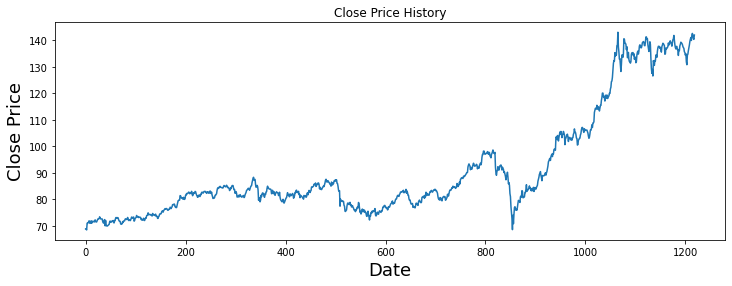

The number of trainning dataset:  853
The number of validation dataset:  243
The number of testing dataset:  123
The shape of input data:  (793, 60, 1)
The shape of validation data:  (243, 60, 1)
The shape of testing data:  (123, 60, 1)


In [26]:
(data,x_train,y_train,y_test,y_val,
 x_train_norm, y_train_norm,x_test_norm,
 y_test_norm,x_val_norm, y_val_norm,output_sc,
 training_data_len, validation_data_len ) = data_preprocessing("0050",60)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import optimizers

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(100))
model.add(Dense(1))

model.summary()
print("\n")
# Compile the model
opt = optimizers.Adam(learning_rate = 1e-3
                     )
model.compile(optimizer = opt, loss = 'mean_squared_error')

# Train the model
model.fit(x_train_norm, y_train_norm, batch_size = 16, epochs = 20, validation_data = (x_val_norm, y_val_norm))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 122,569
Trainable params: 122,569
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
50/50 [==============================] - 7s 79ms/step - loss: 0.0333 - val_loss: 0.0177
Epoch 2/20
50/50 [==============================] - 3s 64ms/step - loss: 0.0033 - val_loss: 0.0124
Epoch 3/20
50/50 [============================

In [7]:
def error_of_predicton():

    # Get the models predicted price values 
    predictions_train = model.predict(x_train_norm)
    predictions_train = output_sc.inverse_transform(predictions_train)

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions_train - y_train) ** 2)))
    print("root mean squred error of trainning data: ", rmse)

    predictions_val = model.predict(x_val_norm)
    predictions_val = output_sc.inverse_transform(predictions_val)

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions_val - y_val) ** 2)))
    print("root mean squred error of validation data: ", rmse)

    predictions_test = model.predict(x_test_norm)
    predictions_test = output_sc.inverse_transform(predictions_test)

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions_test - y_test) ** 2)))
    print("root mean squred error of testing data: ", rmse)
    
    return predictions_val,predictions_test

In [8]:
predictions_val,predictions_test = error_of_predicton()

root mean squred error of trainning data:  0.9286822338478744
root mean squred error of validation data:  1.827128871492629
root mean squred error of testing data:  2.5180522346833043


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


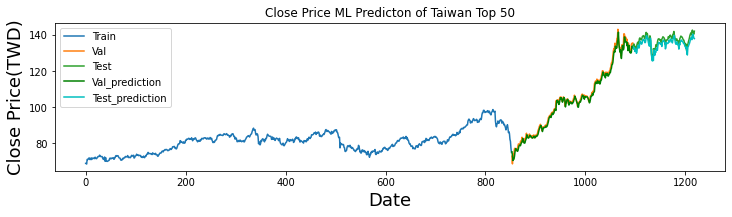

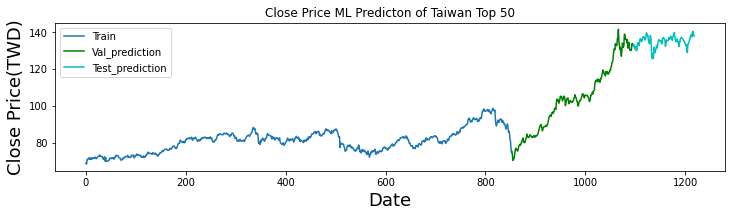

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len: training_data_len+validation_data_len]
test = data[training_data_len+validation_data_len:]
valid['Predictions'] = predictions_val
test['Predictions'] = predictions_test

# Visualize the data
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title('Close Price ML Predicton of Taiwan Top 50')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(TWD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close' ])
plt.plot(test['Close'])
plt.plot(valid['Predictions'],color="g")
plt.plot(test['Predictions'],color="c")
plt.legend(['Train', 'Val', 'Test', 'Val_prediction', 'Test_prediction'], loc='upper left')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(2,1,2)
plt.title('Close Price ML Predicton of Taiwan Top 50')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(TWD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Predictions']],color="g")
plt.plot(test[['Predictions']],color="c")
plt.legend([ 'Train', 'Val_prediction', 'Test_prediction'], loc='upper left')
plt.show()

## SPY

        Date    Open    High     Low   Close  Adj Close       Volume
0  2016/9/12  212.39  216.81  212.31  216.34     197.17  168110900.0
1  2016/9/13  214.84  215.15  212.50  213.23     194.34  182828800.0
2  2016/9/14  213.29  214.70  212.50  213.15     194.26  134185500.0
3  2016/9/15  212.96  215.73  212.75  215.28     196.20  134427900.0
4  2016/9/16  213.48  213.69  212.57  213.37     195.45  155236400.0


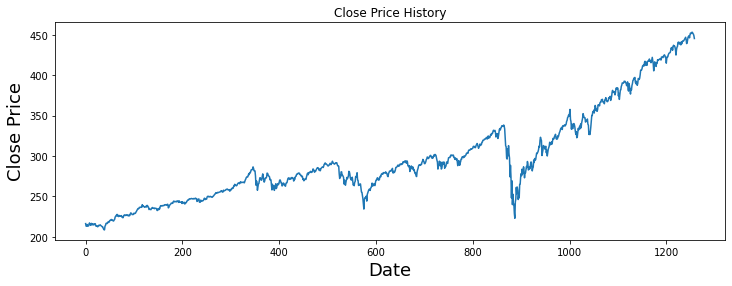

The number of trainning dataset:  881
The number of validation dataset:  251
The number of testing dataset:  127
The shape of input data:  (821, 60, 1)
The shape of validation data:  (251, 60, 1)
The shape of testing data:  (127, 60, 1)


In [25]:
(data,x_train,y_train,y_test,y_val,x_train_norm, y_train_norm,x_test_norm,y_test_norm,
x_val_norm, y_val_norm,output_sc,training_data_len, validation_data_len ) = data_preprocessing("SPY",60)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(100))
model.add(Dense(1))
model.summary()
print("\n")

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train_norm, y_train_norm, batch_size = 16, epochs = 20, validation_data = (x_val_norm, y_val_norm))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 122,569
Trainable params: 122,569
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
52/52 [==============================] - 7s 79ms/step - loss: 0.0372 - val_loss: 0.0116
Epoch 2/20
52/52 [==============================] - 3s 64ms/step - loss: 0.0030 - val_loss: 0.0104
Epoch 3/20
52/52 [============================

In [12]:
predictions_val,predictions_test = error_of_predicton()

root mean squred error of trainning data:  3.8119710108135387
root mean squred error of validation data:  6.061356957312505
root mean squred error of testing data:  3.4964218669750227


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


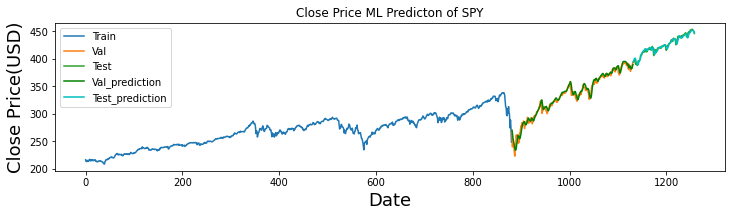

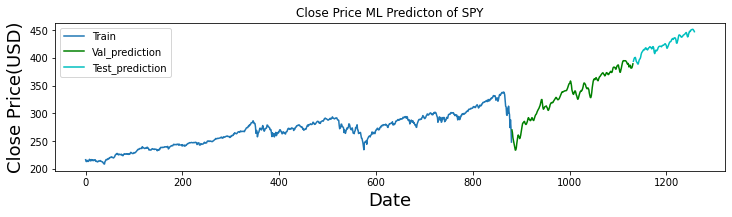

In [13]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len: training_data_len+validation_data_len]
test = data[training_data_len+validation_data_len:]
valid['Predictions'] = predictions_val
test['Predictions'] = predictions_test

# Visualize the data
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title('Close Price ML Predicton of SPY')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close' ])
plt.plot(test['Close'])
plt.plot(valid['Predictions'],color="g")
plt.plot(test['Predictions'],color="c")
plt.legend(['Train', 'Val', 'Test', 'Val_prediction', 'Test_prediction'], loc='upper left')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(2,1,2)
plt.title('Close Price ML Predicton of SPY')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Predictions']],color="g")
plt.plot(test[['Predictions']],color="c")
plt.legend([ 'Train', 'Val_prediction', 'Test_prediction'], loc='upper left')
plt.show()

## TSMC

        Date   Open   High    Low  Close  Change Change%  Volume('000 shares)
0  2016/9/13  176.5  176.5  173.5  175.0   0.00    0.00              36801.58
1  2016/9/14  174.0  176.0  173.5  173.5  (1.50)  (0.86)             52864.22
2  2016/9/19  179.5  183.0  178.5  182.5   9.00    5.19              57003.07
3  2016/9/20  182.0  183.5  181.5  183.0   0.50    0.27              23647.42
4  2016/9/21  181.0  184.0  180.5  184.0   1.00    0.55              24984.79


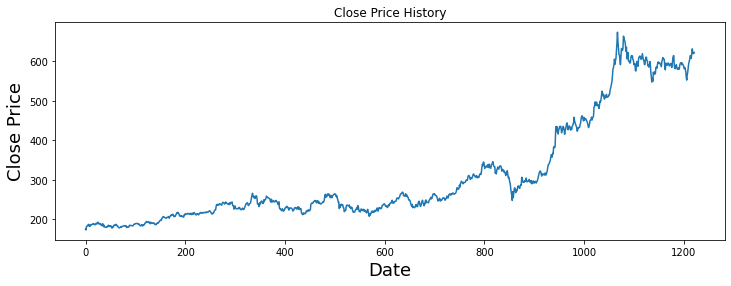

The number of trainning dataset:  855
The number of validation dataset:  244
The number of testing dataset:  123
The shape of input data:  (795, 60, 1)
The shape of validation data:  (244, 60, 1)
The shape of testing data:  (123, 60, 1)


In [27]:
(data,x_train,y_train,y_test,y_val,x_train_norm, y_train_norm,x_test_norm,y_test_norm,
x_val_norm, y_val_norm,output_sc,training_data_len, validation_data_len ) = data_preprocessing("TSMC",60)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(100))
model.add(Dense(1))
model.summary()
print("\n")

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train_norm, y_train_norm, batch_size = 16, epochs = 20, validation_data = (x_val_norm, y_val_norm))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 122,569
Trainable params: 122,569
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
50/50 [==============================] - 7s 82ms/step - loss: 0.0350 - val_loss: 0.0244
Epoch 2/20
50/50 [==============================] - 3s 66ms/step - loss: 0.0026 - val_loss: 0.0643
Epoch 3/20
50/50 [============================

In [17]:
predictions_val,predictions_test = error_of_predicton()

root mean squred error of trainning data:  4.015959372022587
root mean squred error of validation data:  15.268539449018666
root mean squred error of testing data:  22.87246241195475


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


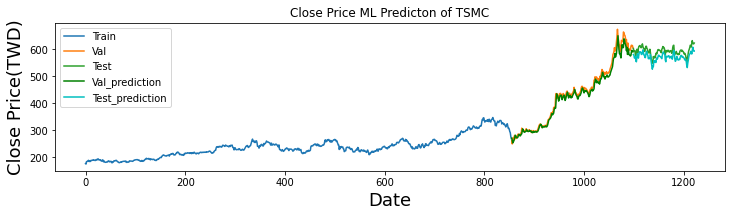

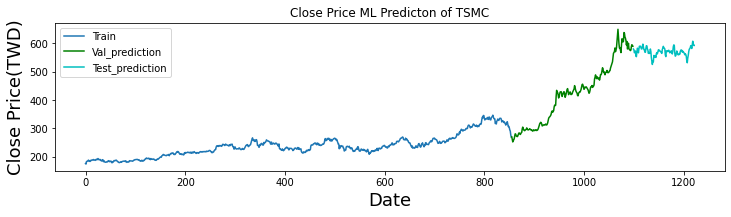

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len: training_data_len+validation_data_len]
test = data[training_data_len+validation_data_len:]
valid['Predictions'] = predictions_val
test['Predictions'] = predictions_test

# Visualize the data
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title('Close Price ML Predicton of TSMC')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(TWD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close' ])
plt.plot(test['Close'])
plt.plot(valid['Predictions'],color="g")
plt.plot(test['Predictions'],color="c")
plt.legend(['Train', 'Val', 'Test', 'Val_prediction', 'Test_prediction'], loc='upper left')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(2,1,2)
plt.title('Close Price ML Predicton of TSMC')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(TWD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Predictions']],color="g")
plt.plot(test[['Predictions']],color="c")
plt.legend([ 'Train', 'Val_prediction', 'Test_prediction'], loc='upper left')
plt.show()

## Intel

        Date   Open   High    Low  Close  Adj Close      Volume
0  2016/9/12  35.19  36.12  35.06  36.08      31.74  22796600.0
1  2016/9/13  35.75  35.88  35.32  35.61      31.33  23591300.0
2  2016/9/14  35.51  35.82  35.40  35.62      31.33  14074500.0
3  2016/9/15  35.74  36.65  35.54  36.56      32.16  23736000.0
4  2016/9/16  37.72  38.05  37.25  37.67      33.14  74577900.0


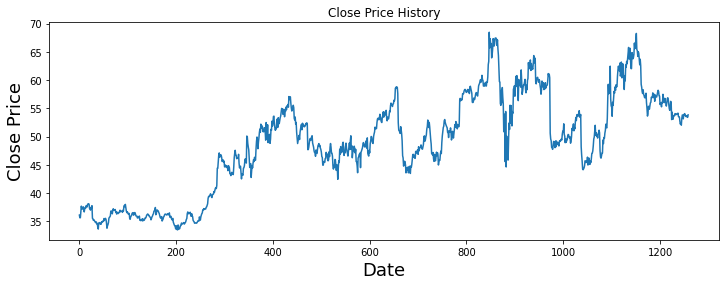

The number of trainning dataset:  881
The number of validation dataset:  251
The number of testing dataset:  127
The shape of input data:  (821, 60, 1)
The shape of validation data:  (251, 60, 1)
The shape of testing data:  (127, 60, 1)


In [28]:
(data,x_train,y_train,y_test,y_val,x_train_norm, y_train_norm,x_test_norm,y_test_norm,
x_val_norm, y_val_norm,output_sc,training_data_len, validation_data_len ) = data_preprocessing("INTC",60)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(100))
model.add(Dense(1))
model.summary()
print("\n")

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train_norm, y_train_norm, batch_size = 16, epochs = 20, validation_data = (x_val_norm, y_val_norm))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 122,569
Trainable params: 122,569
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
52/52 [==============================] - 7s 80ms/step - loss: 0.0365 - val_loss: 0.0080
Epoch 2/20
52/52 [==============================] - 3s 65ms/step - loss: 0.0033 - val_loss: 0.0065
Epoch 3/20
52/52 [============================

In [22]:
predictions_val,predictions_test = error_of_predicton()

root mean squred error of trainning data:  1.0043314197898991
root mean squred error of validation data:  1.7232297103772094
root mean squred error of testing data:  1.0017193703242138


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


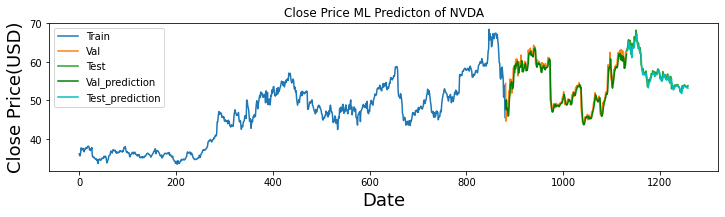

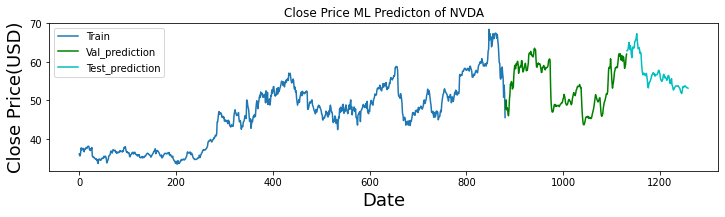

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len: training_data_len+validation_data_len]
test = data[training_data_len+validation_data_len:]
valid['Predictions'] = predictions_val
test['Predictions'] = predictions_test

# Visualize the data
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title('Close Price ML Predicton of NVDA')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close' ])
plt.plot(test['Close'])
plt.plot(valid['Predictions'],color="g")
plt.plot(test['Predictions'],color="c")
plt.legend(['Train', 'Val', 'Test', 'Val_prediction', 'Test_prediction'], loc='upper left')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(2,1,2)
plt.title('Close Price ML Predicton of NVDA')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Predictions']],color="g")
plt.plot(test[['Predictions']],color="c")
plt.legend([ 'Train', 'Val_prediction', 'Test_prediction'], loc='upper left')
plt.show()